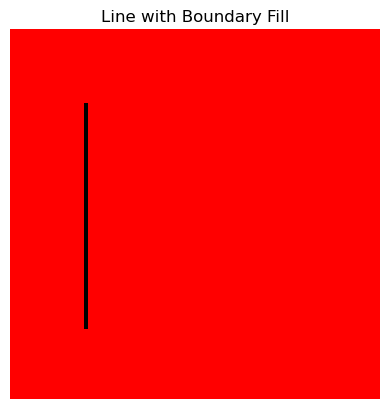

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def draw_line(x1, y1, x2, y2):
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    err = dx - dy
    x, y = x1, y1
    points = []

    while True:
        points.append((x, y))
        if x == x2 and y == y2:
            break
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x += sx
        if e2 < dx:
            err += dx
            y += sy
    return points

def boundary_fill(image, x, y, fill_color, boundary_color):
    stack = [(x, y)]
    h, w = image.shape[:2]

    while stack:
        x, y = stack.pop()
        if 0 <= x < h and 0 <= y < w:
            if not np.array_equal(image[x, y], boundary_color) and not np.array_equal(image[x, y], fill_color):
                image[x, y] = fill_color
                stack.extend([
                    (x + 1, y), (x - 1, y),
                    (x, y + 1), (x, y - 1),
                    (x + 1, y + 1), (x - 1, y - 1),
                    (x + 1, y - 1), (x - 1, y + 1)
                ])

# --- Initialize blank image ---
size = 100
image = np.ones((size, size, 3), dtype=np.uint8) * 255  # White background

# --- Draw a single line ---
x1, y1 = 20, 20
x2, y2 = 80, 20
line_points = draw_line(x1, y1, x2, y2)

for x, y in line_points:
    if 0 <= x < size and 0 <= y < size:
        image[x, y] = [0, 0, 0]  # black line

# --- Fill inside the line boundary ---
start_x, start_y = 50, 21  # point just below the line
fill_color = (255, 0, 0)  # Red
boundary_color = (0, 0, 0)  # Black line as boundary

boundary_fill(image, start_x, start_y, fill_color, boundary_color)

# --- Show result ---
plt.imshow(image)
plt.title("Line with Boundary Fill")
plt.axis('off')
plt.show()
